<a href="https://colab.research.google.com/github/acharjee19/Machine-learning-and-data-science/blob/master/froud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from sklearn.metrics import classification_report,accuracy_score

### Importing Libraries for Outlier Detection

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#Data Analysis

In [7]:
df.shape

(284807, 31)

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

##Checking the distribution of Normal and fraud cases in our data set

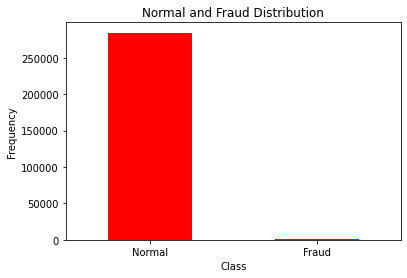

In [10]:
fraud_check = pd.value_counts(df['Class'], sort = True)
fraud_check.plot(kind = 'bar', rot=0, color= 'r')
plt.title("Normal and Fraud Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
 ## Defining labels to replace our 0 and 1 valuelabels= ['Normal','Fraud']
## mapping those labels
labels = ['Normal', 'Fraud']

plt.xticks(range(2), labels)
plt.show()

###Let us see what is the shape of normal and Fraud data set

In [11]:
fraud_people = df[df['Class']==1]
normal_people = df[df['Class']==0]

In [12]:
fraud_people.shape

(492, 31)

In [13]:
normal_people.shape

(284315, 31)

###Finding out the avg amount in our both the data sets

In [16]:
fraud_people['Amount'].describe()


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
normal_people['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

###Let us analyse it visually

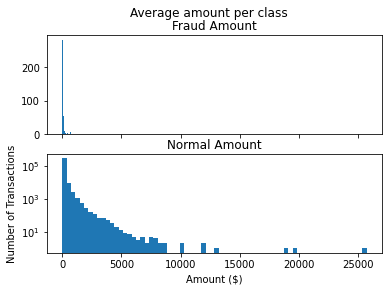

In [17]:
graph, (plot1, plot2) = plt.subplots(2,1,sharex= True)
graph.suptitle('Average amount per class')
bins = 70

plot1.hist(fraud_people['Amount'] , bins = bins)
plot1.set_title('Fraud Amount')

plot2.hist(normal_people['Amount'] , bins = bins)
plot2.set_title('Normal Amount')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show();

###plotting a corr Heatmap

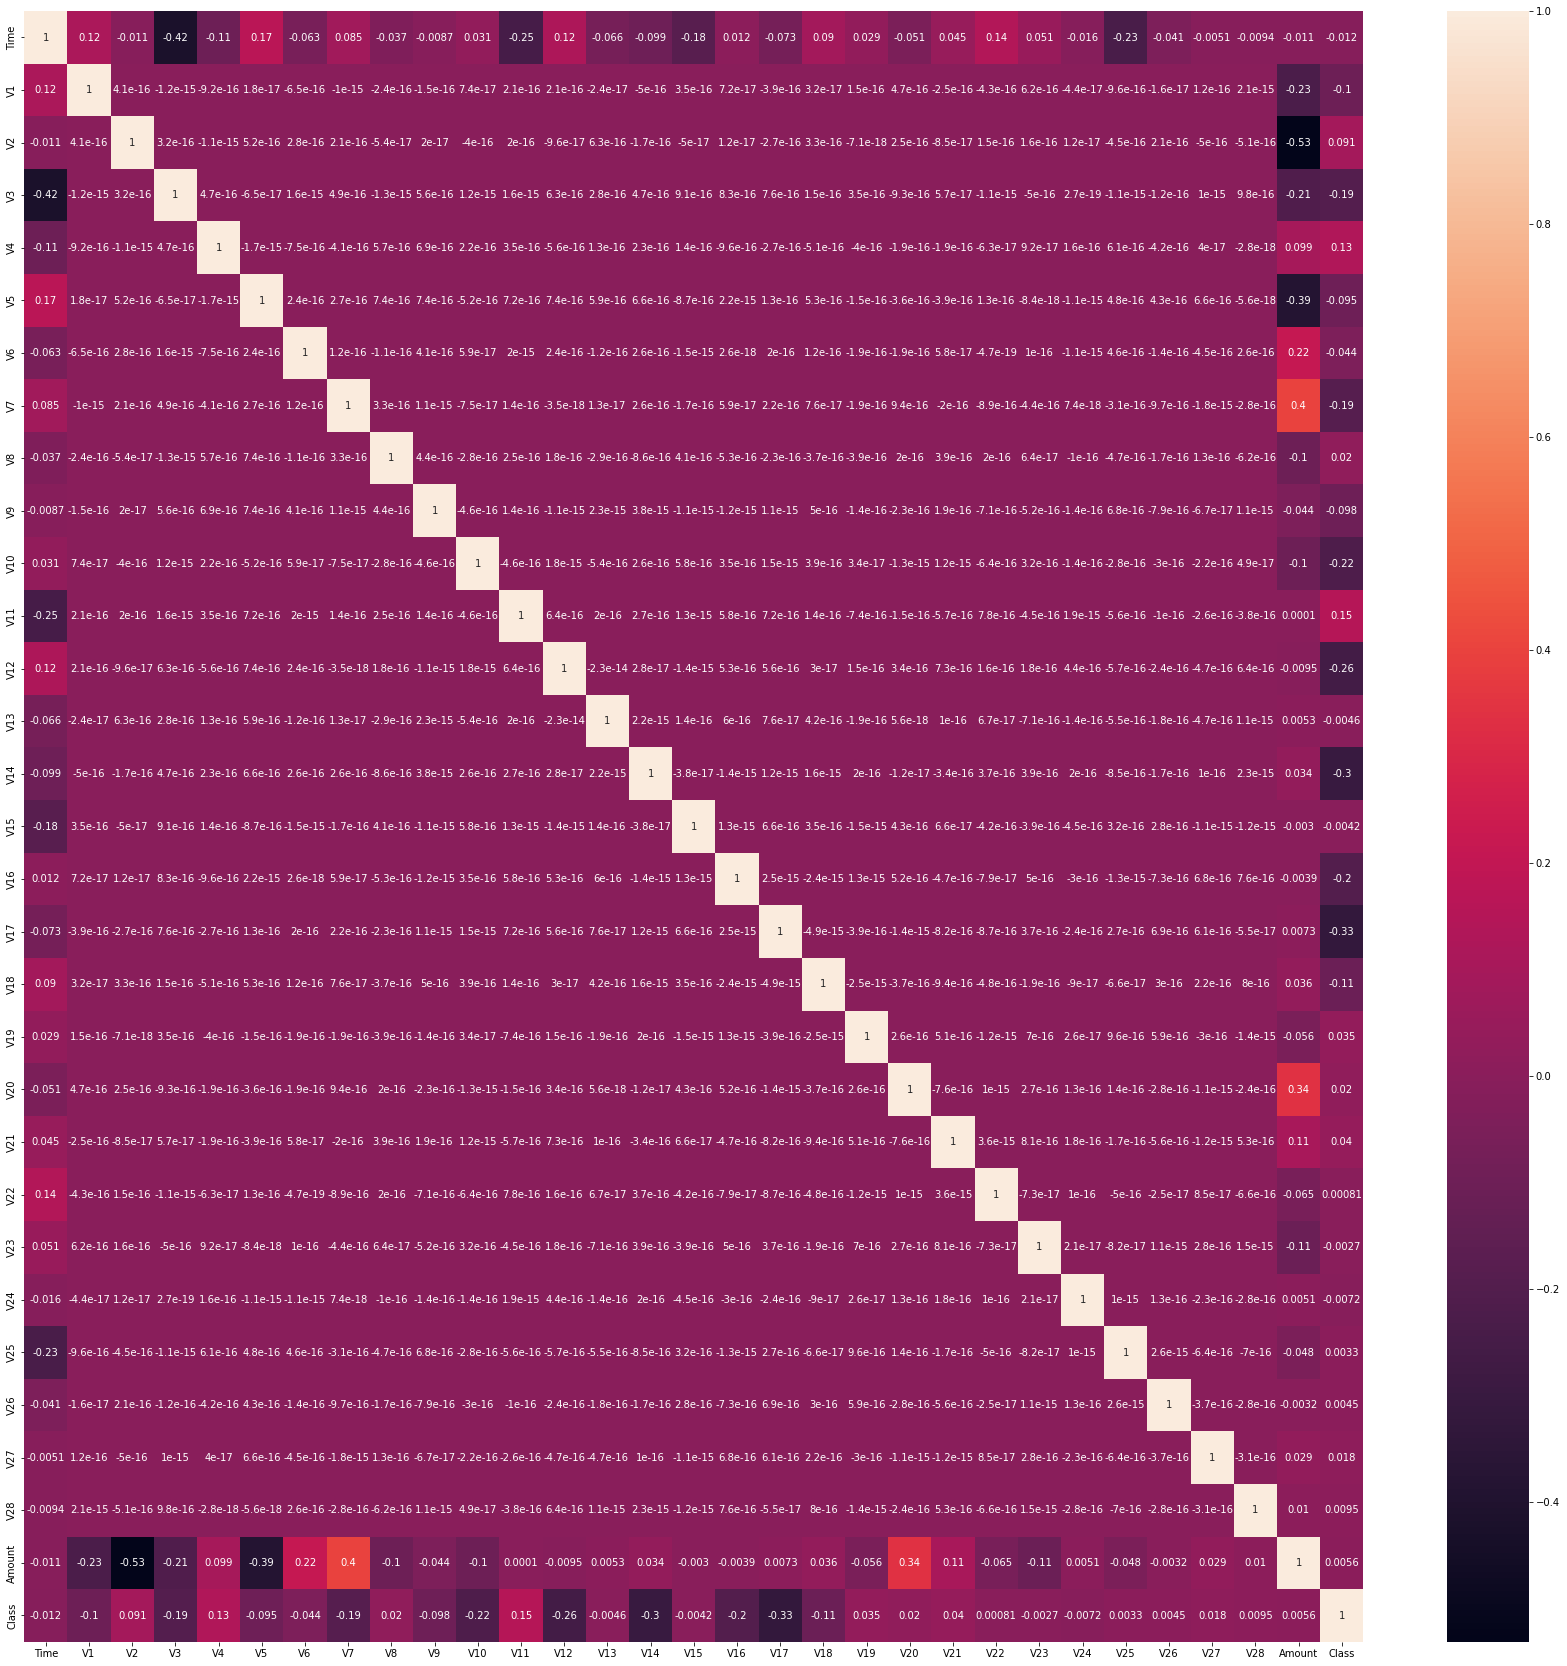

In [18]:
df.corr()
plt.figure(figsize=(30,30))
g=sns.heatmap(df.corr(),annot=True)

###Creating our Dependent and Independent Features

In [19]:
columns = df.columns.tolist()
# Making our Independent Features
columns = [var for var in columns if var not in ["Class"]]
# Making our Dependent Variable
target = "Class"
x= df[columns]
y= df[target]

In [20]:
x.shape

(284807, 30)

In [21]:
y.shape

(284807,)

In [22]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [23]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

###Model building

###Splitting the data

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

## We wil be using the following Models for our Anamoly Detection:
- Isolation Forest
- OneClassSVM

## Isolation Forest

#### One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

#### This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

#### Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.

#### How Isolation Forests Work The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

#### The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation

In [26]:
from sklearn.ensemble import IsolationForest


In [27]:
iso_forest= IsolationForest(n_estimators=100, max_samples=len(x_train),random_state=0, verbose=0)                        

In [30]:
iso_forest.fit(x_train)


IsolationForest(max_samples=199364, random_state=0)

#### Mapping the values as we want to have an output in 0 and 1

In [31]:
ypred= iso_forest.predict(x_test)

In [32]:
ypred[ypred == 1] = 0
ypred[ypred == -1] = 1


### Accuracy score and Matrix

In [33]:
print(accuracy_score(y_test,ypred))

0.9978465175614152


In [34]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.37      0.51      0.43       136

    accuracy                           1.00     85443
   macro avg       0.69      0.76      0.72     85443
weighted avg       1.00      1.00      1.00     85443



In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test, ypred)

array([[85189,   118],
       [   66,    70]])

### We can also print how many errors our model have

In [37]:
n_errors = (ypred != y_test).sum()
print("Isolation Forest have {} errors.".format(n_errors))

Isolation Forest have 184 errors.


## OneClassSVM

In [5]:
svm= OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05)

NameError: ignored

In [ ]:
svm.fit(x_train,y_train)

#### Here also we do the same thing as above, mapping our results in 0 and 1

In [2]:
ypred1[ypred1 == 1] = 0
ypred1[ypred1 == -1] = 1

NameError: ignored

### Accuracy score and Matrix

In [1]:
print(accuracy_score(y_test,ypred))

NameError: ignored

In [ ]:
print(classification_report(y_test,ypred))

In [3]:
from sklearn.metrics import confusion_matrix

In [4]:
confusion_matrix(y_test, ypred)

NameError: ignored

In [ ]:
n_errors = (ypred1 != y_test).sum()
print("SVM have {} errors.".format(n_errors))

## Solving the Problem Statement using PyCaret Library(Auto ML)

In [7]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 4.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [15]:
#df= pd.read_csv("creditcard.csv")
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")

In [16]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
from pycaret.classification import *

In [17]:
model= setup(data= df, target= 'Class')

,Description,Value
0,Session id,8571
1,Target,Class
2,Target type,Binary
3,Original data shape,"(284807, 31)"
4,Transformed data shape,"(284807, 31)"
5,Transformed train set shape,"(199364, 31)"
6,Transformed test set shape,"(85443, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [18]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9995,0.9458,0.7615,0.9389,0.8380,0.8378,0.8438,155.9560
et,Extra Trees Classifier,0.9995,0.9429,0.7647,0.9499,0.8442,0.8439,0.8505,18.1430
xgboost,Extreme Gradient Boosting,0.9995,0.9804,0.7790,0.9482,0.8514,0.8512,0.8573,101.0980
lda,Linear Discriminant Analysis,0.9994,0.8938,0.7560,0.8633,0.8030,0.8027,0.8060,1.4800
lr,Logistic Regression,0.9992,0.9349,0.6576,0.8570,0.7391,0.7387,0.7477,6.7320
dt,Decision Tree Classifier,0.9991,0.8674,0.7352,0.7259,0.7276,0.7271,0.7286,14.3300
ada,Ada Boost Classifier,0.9991,0.9639,0.6803,0.8018,0.7327,0.7323,0.7364,46.9030
gbc,Gradient Boosting Classifier,0.9991,0.7756,0.6084,0.8257,0.6852,0.6848,0.7000,251.5100
ridge,Ridge Classifier,0.9989,0.0000,0.4187,0.8350,0.5541,0.5536,0.5886,0.4820
knn,K Neighbors Classifier,0.9984,0.6019,0.0555,0.6857,0.0999,0.0997,0.1865,44.3940


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=8571, verbose=0, warm_start=False)

In [19]:
random_forest= create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9997,0.9848,0.8857,0.9688,0.9254,0.9252,0.9262
1,0.9997,0.9555,0.8286,1.0000,0.9062,0.9061,0.9101
2,0.9993,0.9258,0.6857,0.9231,0.7869,0.7866,0.7953
3,0.9994,0.9116,0.6857,0.9600,0.8000,0.7997,0.8111
4,0.9996,0.9546,0.8529,0.9355,0.8923,0.8921,0.8931
5,0.9992,0.8938,0.6176,0.9130,0.7368,0.7365,0.7506
6,0.9992,0.9535,0.6471,0.8462,0.7333,0.7329,0.7396
7,0.9997,0.9849,0.8824,0.9677,0.9231,0.9230,0.9239
8,0.9995,0.9545,0.8235,0.8750,0.8485,0.8482,0.8486


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### As we see we have a very good Kappa score which is often seen in an Imbalanced dataset

In [34]:
random_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=8571, verbose=0, warm_start=False)

### We can Hypertune our model 

In [25]:
from pycaret.classification import *

In [ ]:
tuned_model= tune_model(random_forest)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,07:55:03
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [31]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")

### predictions

In [28]:
pred_holdout = predict_model(random_forest,data= x_test)

NameError: ignored

In [ ]:
pred_holdout